# Logistic Regression Project (Predict Ad click)

In this notebook we will use `Logistic Regression` to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': customer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

## Get the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("data/advertising.csv")
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


# 1. Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
df['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

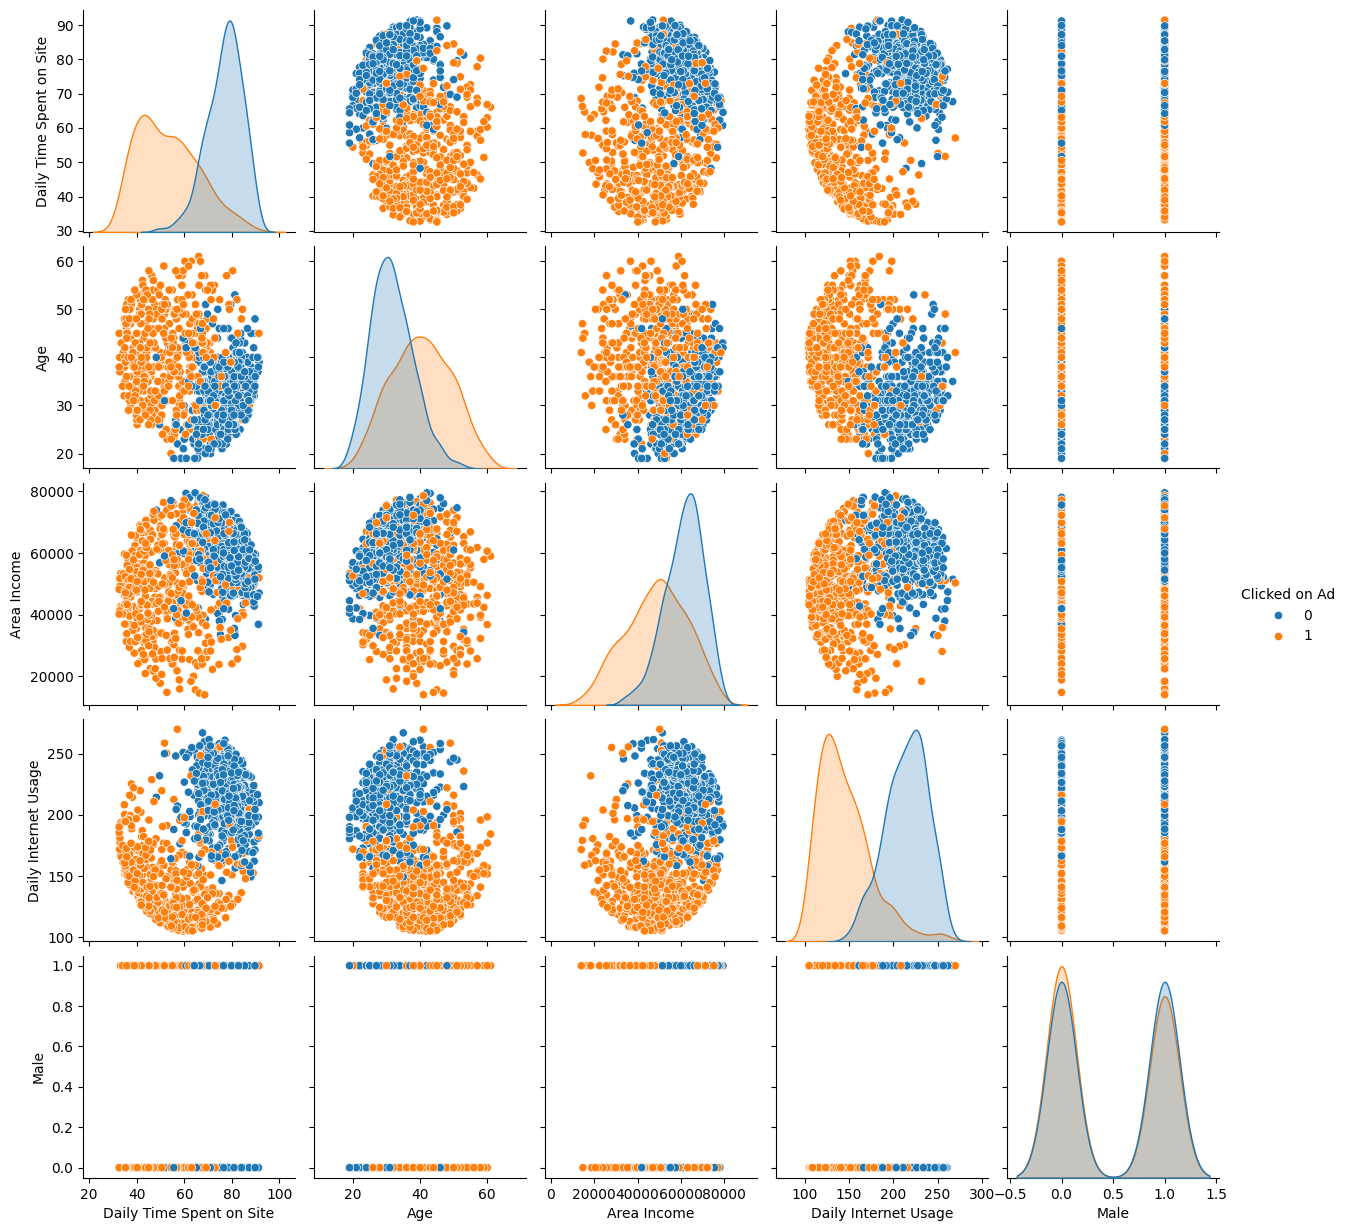

In [6]:
sns.pairplot(df, hue='Clicked on Ad')

<Axes: >

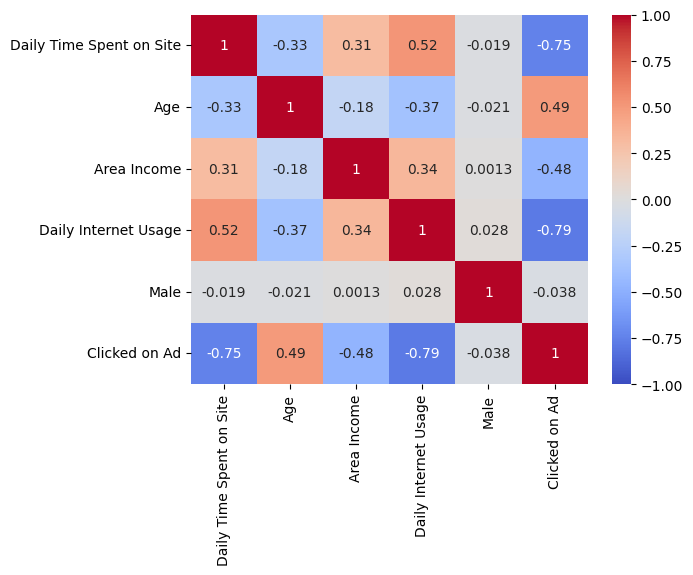

In [7]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", vmin=-1)

# 2. Prepare Data for Logistic Regression



#### 1. Feature engineering


In [8]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [9]:
df['Ad Topic Line'].nunique()

1000

In [10]:
df['Ad Topic Line'].str.split(" ")

0         [Cloned, 5thgeneration, orchestration]
1         [Monitored, national, standardization]
2           [Organic, bottom-line, service-desk]
3      [Triple-buffered, reciprocal, time-frame]
4              [Robust, logistical, utilization]
                         ...                    
995            [Fundamental, modular, algorithm]
996          [Grass-roots, cohesive, monitoring]
997             [Expanded, intangible, solution]
998     [Proactive, bandwidth-monitored, policy]
999          [Virtual, 5thgeneration, emulation]
Name: Ad Topic Line, Length: 1000, dtype: object

In [11]:
lista_palabras = []
for topic in df['Ad Topic Line']:
    for palabra in topic.split(" "):
        lista_palabras.append(palabra.lower())

In [12]:
pd.Series(lista_palabras).value_counts()

interface          33
solution           29
system             24
user               24
secured            23
                   ..
static              4
persistent          4
profit-focused      4
intelligence        4
functionalities     4
Name: count, Length: 315, dtype: int64

In [13]:
df['Topic_solution'] = np.where(df['Ad Topic Line'].str.contains("solution"), 1, 0)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Topic_solution
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0


In [14]:
df['Topic_solution'].value_counts()

Topic_solution
0    964
1     36
Name: count, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
df['City_encoded'] = encoder.fit_transform(df['City'])
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Topic_solution,City_encoded
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,961
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0,903
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0,111
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0,939
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0,805
...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,0,126
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,0,488
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,1,798
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,0,935


In [17]:
df['City_encoded'].nunique()/len(df)

0.969

In [18]:
pd.get_dummies(df['Country'])

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antarctica (the territory South of 60 deg S),Antigua and Barbuda,Argentina,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
encoder = LabelEncoder()
df['Country_encoded'] = encoder.fit_transform(df['Country'])
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Topic_solution,City_encoded,Country_encoded
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,961,215
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0,903,147
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0,111,184
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0,939,103
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0,805,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,0,126,116
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,0,488,26
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,1,798,140
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,0,935,85


In [20]:
df['Country'].nunique()

237

In [21]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Topic_solution', 'City_encoded',
       'Country_encoded'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
 10  Topic_solution            1000 non-null   int64  
 11  City_encoded              1000 non-null   int64  
 12  Country_encoded           1000 non-null   int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 101.7+ KB


In [23]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [24]:
df['month'] = df['Timestamp'].dt.month
df['month_dau'] = df['Timestamp'].dt.day
df['week_day'] = df['Timestamp'].dt.weekday
df['hour'] = df['Timestamp'].dt.hour
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Topic_solution,City_encoded,Country_encoded,month,month_dau,week_day,hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,961,215,3,27,6,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0,903,147,4,4,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0,111,184,3,13,6,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0,939,103,1,10,6,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0,805,96,6,3,4,3


In [25]:
df.groupby('Topic_solution')['Clicked on Ad'].mean()

Topic_solution
0    0.5
1    0.5
Name: Clicked on Ad, dtype: float64

In [26]:
df.groupby('Topic_solution')['Clicked on Ad'].value_counts()

Topic_solution  Clicked on Ad
0               0                482
                1                482
1               0                 18
                1                 18
Name: count, dtype: int64

In [27]:
df.groupby('month')['Clicked on Ad'].mean()

month
1    0.469388
2    0.518750
3    0.474359
4    0.503401
5    0.537415
6    0.500000
7    0.495050
Name: Clicked on Ad, dtype: float64

In [28]:
df.groupby('hour')['Clicked on Ad'].mean()

hour
0     0.577778
1     0.500000
2     0.472222
3     0.547619
4     0.500000
5     0.477273
6     0.589744
7     0.481481
8     0.488372
9     0.571429
10    0.451613
11    0.600000
12    0.421053
13    0.500000
14    0.488372
15    0.542857
16    0.410256
17    0.560976
18    0.609756
19    0.487179
20    0.480000
21    0.395833
22    0.441860
23    0.409091
Name: Clicked on Ad, dtype: float64

In [29]:
df.groupby('hour')['Clicked on Ad'].value_counts(normalize=True)

hour  Clicked on Ad
0     1                0.577778
      0                0.422222
1     0                0.500000
      1                0.500000
2     0                0.527778
      1                0.472222
3     1                0.547619
      0                0.452381
4     0                0.500000
      1                0.500000
5     0                0.522727
      1                0.477273
6     1                0.589744
      0                0.410256
7     0                0.518519
      1                0.481481
8     0                0.511628
      1                0.488372
9     1                0.571429
      0                0.428571
10    0                0.548387
      1                0.451613
11    1                0.600000
      0                0.400000
12    0                0.578947
      1                0.421053
13    0                0.500000
      1                0.500000
14    0                0.511628
      1                0.488372
15    1             

In [30]:
df.groupby('month_dau')['Clicked on Ad'].mean()

month_dau
1     0.575758
2     0.400000
3     0.565217
4     0.388889
5     0.514286
6     0.560000
7     0.437500
8     0.428571
9     0.588235
10    0.513514
11    0.468750
12    0.689655
13    0.566667
14    0.636364
15    0.487805
16    0.400000
17    0.428571
18    0.485714
19    0.413793
20    0.333333
21    0.468750
22    0.416667
23    0.628571
24    0.545455
25    0.652174
26    0.416667
27    0.457143
28    0.566667
29    0.517241
30    0.500000
31    0.500000
Name: Clicked on Ad, dtype: float64

In [31]:
df.groupby('week_day')['Clicked on Ad'].mean()

week_day
0    0.514286
1    0.450820
2    0.506410
3    0.556338
4    0.458065
5    0.507937
6    0.503145
Name: Clicked on Ad, dtype: float64

<Axes: >

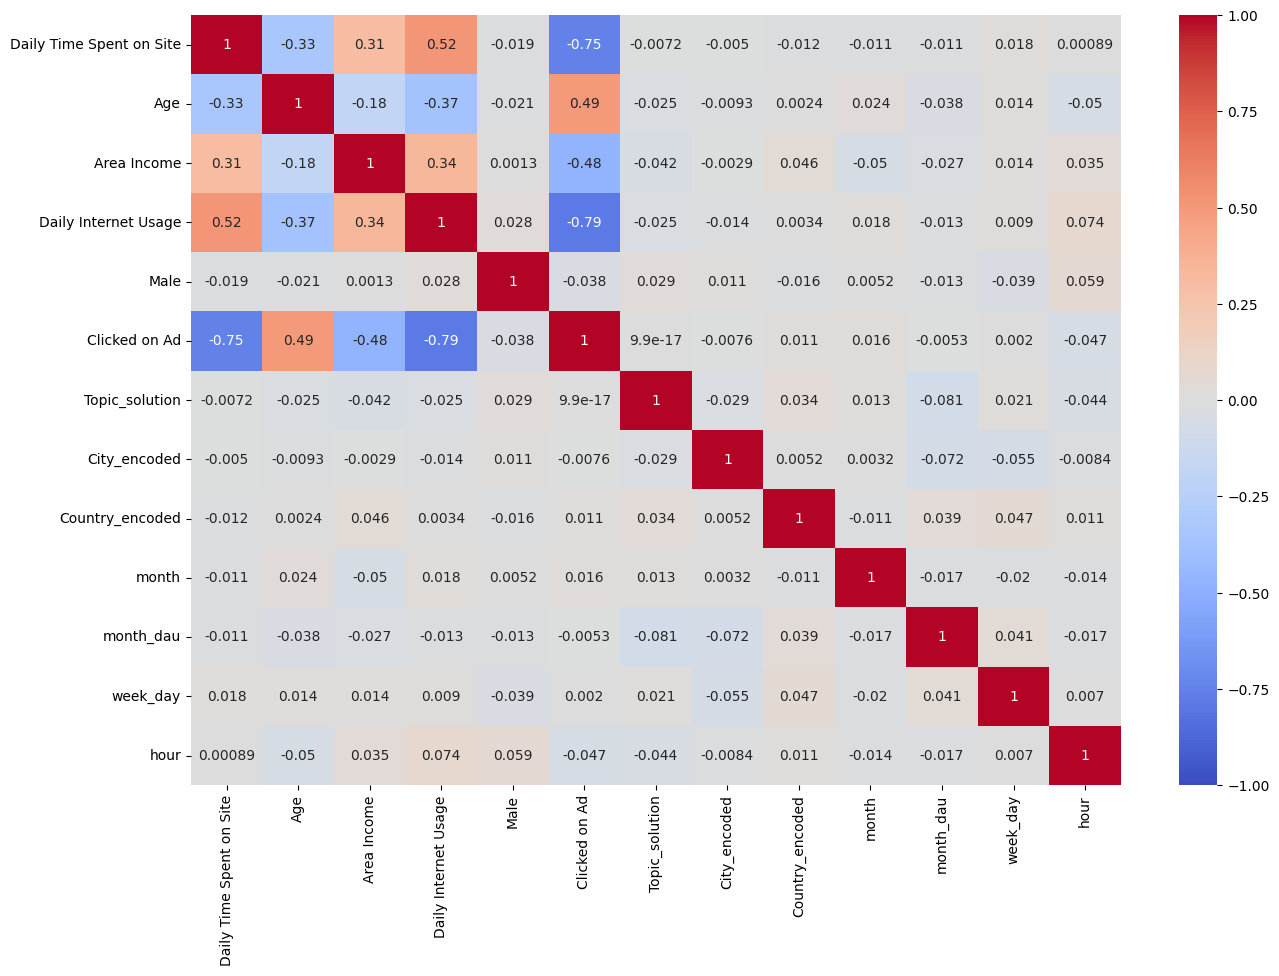

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", vmin=-1)


#### 2. Train test split


In [33]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Topic_solution', 'City_encoded',
       'Country_encoded', 'month', 'month_dau', 'week_day', 'hour'],
      dtype='object')

In [34]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Topic_solution', 'month',
       'month_dau', 'week_day', 'hour']]
# X = df[['Daily Time Spent on Site','Daily Internet Usage']]
y = df['Clicked on Ad']

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 10)
(200, 10)
(800,)
(200,)


<Axes: >

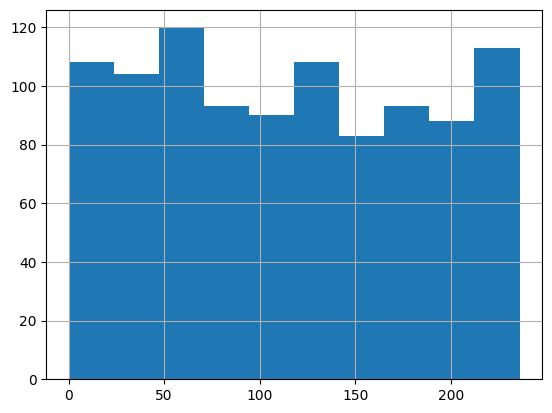

In [37]:
df['Country_encoded'].hist()


#### 3. StandardScaler()


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

In [39]:
scaler.inverse_transform(X_test_scal)

array([[6.326000e+01, 2.900000e+01, 5.478737e+04, ..., 2.000000e+00,
        2.000000e+00, 4.000000e+00],
       [7.123000e+01, 5.200000e+01, 4.152128e+04, ..., 5.000000e+00,
        1.000000e+00, 1.100000e+01],
       [4.363000e+01, 3.800000e+01, 6.175712e+04, ..., 2.500000e+01,
        2.000000e+00, 1.900000e+01],
       ...,
       [5.951000e+01, 5.800000e+01, 3.913264e+04, ..., 1.600000e+01,
        3.000000e+00, 2.000000e+00],
       [7.621000e+01, 3.100000e+01, 6.583497e+04, ..., 1.900000e+01,
        6.000000e+00, 2.300000e+01],
       [5.614000e+01, 3.800000e+01, 3.268904e+04, ..., 3.000000e+00,
        2.000000e+00, 7.000000e+00]])

# 3. Implement a Logistic Regression in Scikit-Learn and predict. Use cross validation.

In [40]:
from sklearn.linear_model import LogisticRegression

log_r = LogisticRegression()

In [41]:
log_r.fit(X_train_scal, y_train)

y_pred = log_r.predict(X_test_scal)

In [42]:
from sklearn.model_selection import cross_val_score
scaler = StandardScaler()

results_cv = cross_val_score(log_r, scaler.fit_transform(X_train), y_train, scoring="accuracy", cv=10)
print(results_cv)
print(results_cv.mean())
print(results_cv.std())

[0.9875 0.975  0.9875 0.9875 0.975  0.9875 0.9375 0.95   0.9875 0.9625]
0.9737500000000001
0.01718465885608442


# 4. Evaluation


In [43]:
y_pred

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1])

In [44]:
log_r.score(X_test_scal, y_test)

0.95

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

In [46]:
accuracy_score(y_pred, y_test)

0.95

(TP + TN)/ (TP + FP + TN + FN)

In [47]:
(85 + 105) / (85 + 105 + 4 + 6)

0.95


#### 1. Confusion Matrix


In [48]:
confusion_matrix(y_test, y_pred)

array([[ 85,   4],
       [  6, 105]])

<Axes: >

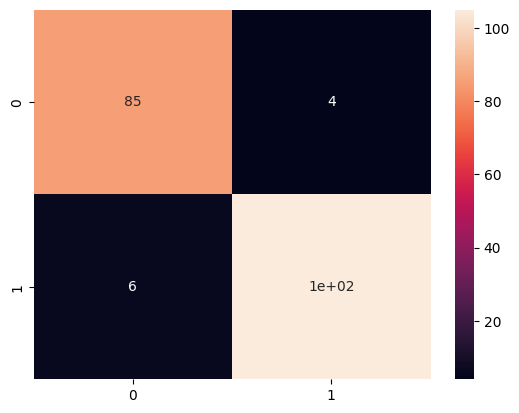

In [72]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)


#### 2. Precision


TP / (TP + FP)

In [50]:
105 / (105 + 4)

0.963302752293578

In [51]:
p = precision_score(y_test, y_pred)
p

np.float64(0.963302752293578)



#### 3. Recall


TP / (TP + FN)

In [52]:
105 / (105 + 6)

0.9459459459459459

In [53]:
r = recall_score(y_test, y_pred)
r

np.float64(0.9459459459459459)



#### 4. F1 Score


2 * r * p / (r + p)

In [54]:
2 * r * p / (r + p)

np.float64(0.9545454545454546)

In [55]:
f1_score(y_test, y_pred)

np.float64(0.9545454545454546)



#### 5. ROC curve

In [56]:
from sklearn.metrics import roc_auc_score

In [57]:
roc_auc_score(y_test, y_pred)

np.float64(0.9505010628606135)

In [58]:
from sklearn.metrics import roc_curve

In [59]:
y_pred_prob = log_r.predict_proba(X_test_scal)

In [60]:
y_pred_prob

array([[1.02509367e-02, 9.89749063e-01],
       [2.87413108e-04, 9.99712587e-01],
       [1.21625771e-03, 9.98783742e-01],
       [3.74276503e-03, 9.96257235e-01],
       [9.91470518e-01, 8.52948238e-03],
       [4.62361492e-01, 5.37638508e-01],
       [9.73373793e-01, 2.66262074e-02],
       [1.11286364e-04, 9.99888714e-01],
       [9.92353807e-01, 7.64619346e-03],
       [1.92890564e-05, 9.99980711e-01],
       [9.97172811e-01, 2.82718894e-03],
       [1.02171332e-03, 9.98978287e-01],
       [1.48942348e-05, 9.99985106e-01],
       [9.91633078e-01, 8.36692189e-03],
       [1.72334888e-04, 9.99827665e-01],
       [2.47235368e-05, 9.99975276e-01],
       [1.34820754e-05, 9.99986518e-01],
       [2.17190033e-03, 9.97828100e-01],
       [9.67104632e-01, 3.28953677e-02],
       [7.41287489e-05, 9.99925871e-01],
       [9.94512010e-01, 5.48799048e-03],
       [6.74375758e-03, 9.93256242e-01],
       [7.15912664e-06, 9.99992841e-01],
       [8.46666363e-01, 1.53333637e-01],
       [9.889538

In [61]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob[:,1])

In [62]:
pd.DataFrame({"tpr":tpr, "fpr":fpr, "threshold":threshold})

,tpr,fpr,threshold
0,0.000000,0.000000,inf
1,0.009009,0.000000,0.999995
2,0.846847,0.000000,0.946610
3,0.846847,0.011236,0.932655
4,0.864865,0.011236,0.885341
5,0.864865,0.022472,0.877866
6,0.909910,0.022472,0.739909
7,0.909910,0.033708,0.730895
8,0.945946,0.033708,0.540375
9,0.945946,0.044944,0.537639


Text(0.5, 1.0, 'ROC Curve')

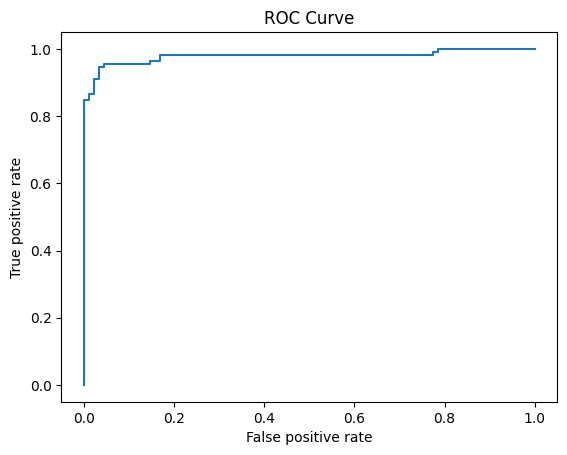

In [63]:
plt.plot(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC Curve")



#### 6. P-R curve

In [64]:
from sklearn.metrics import precision_recall_curve

prec, rec, thresholds = precision_recall_curve(y_test, y_pred_prob[:,1])

In [65]:
len(thresholds)

200

In [66]:
pd.DataFrame({"prec":prec[1:], "rec":rec[1:], "threshold":thresholds})[80:100]

,prec,rec,threshold
80,0.890756,0.954955,0.154704
81,0.898305,0.954955,0.167099
82,0.905983,0.954955,0.171075
83,0.913793,0.954955,0.183012
84,0.921739,0.954955,0.188278
85,0.929825,0.954955,0.205331
86,0.938053,0.954955,0.336713
87,0.946429,0.954955,0.408484
88,0.954955,0.954955,0.461044
89,0.963636,0.954955,0.483095


Text(0.5, 1.0, 'PR Curve')

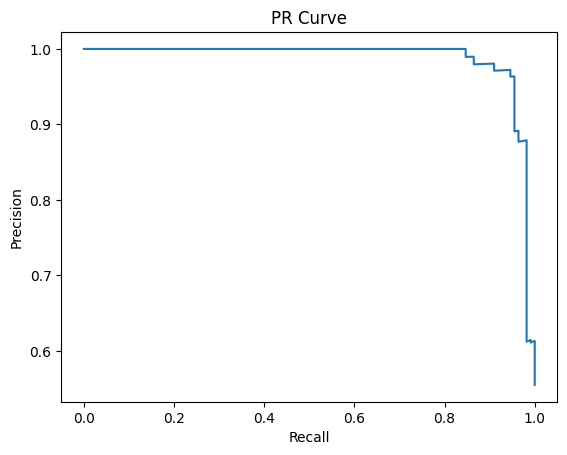

In [67]:
plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR Curve")

In [68]:
coefficients = log_r.coef_[0]  # Coeficientes de la clase positiva (si binario)

# Importancia relativa (valores absolutos)
feature_importances = np.abs(coefficients)

# Emparejar con los nombres de las características
feature_names = X_train.columns  # Si estás trabajando con pandas
importances = dict(zip(feature_names, feature_importances))

# Ordenar por importancia
importances_sorted = sorted(importances.items(), key=lambda x: x[1], reverse=True)

print("Feature Importances:")
for feature, importance in importances_sorted:
    print(f"{feature}: {importance:.4f}")

Feature Importances:
Daily Internet Usage: 2.8293
Daily Time Spent on Site: 2.5640
Area Income: 1.6707
Age: 1.2452
Male: 0.3295
month: 0.2574
week_day: 0.2314
month_dau: 0.1908
Topic_solution: 0.1542
hour: 0.1057


In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        89
           1       0.96      0.95      0.95       111

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

